In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn.model_selection import learning_curve

In [23]:
df=pd.read_csv("EV_cleaned_InnovationScore.csv")

In [24]:
df.head(4)

,Battery,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,Inovation_Score
0,75.0,172,670.0,59017.0,435,217,0.461837
1,57.5,137,700.0,46220.0,420,201,0.402642
2,60.5,183,370.0,44625.0,330,160,0.340271
3,61.7,171,630.0,39990.0,360,160,0.379413


In [25]:
x=df.drop('Inovation_Score',axis=1)
y=df['Inovation_Score']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Linerar Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
    'n_jobs': [-1]
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Best Score: 0.994535896986387


In [27]:
model_linear=LinearRegression(copy_X=True, fit_intercept=True,
n_jobs= -1, positive= False)

In [28]:
model_linear.fit(X_train,y_train)
y_pred=model_linear.predict(X_test)

In [29]:
print("Test R2:", r2_score(y_test, y_pred))


Test R2: 0.9903695625989035


In [30]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 0.00010003284622385007
MAE: 0.006618748129896238
RMSE: 0.010001642176355345


In [31]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model_linear, x, y, cv=5, scoring='r2')
print("CV mean:", np.mean(scores))
print("CV std:", np.std(scores))

CV mean: 0.9924195274557291
CV std: 0.001721147344895414


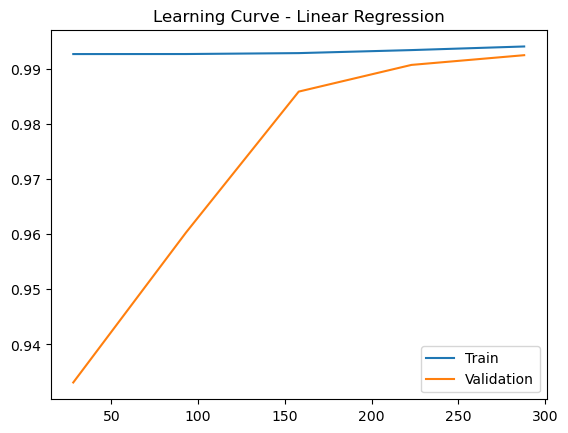

In [32]:
train_sizes, train_scores, val_scores = learning_curve(
    model_linear, x, y, cv=5, scoring='r2', n_jobs=-1
)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
plt.legend()
plt.title("Learning Curve - Linear Regression")
plt.show()

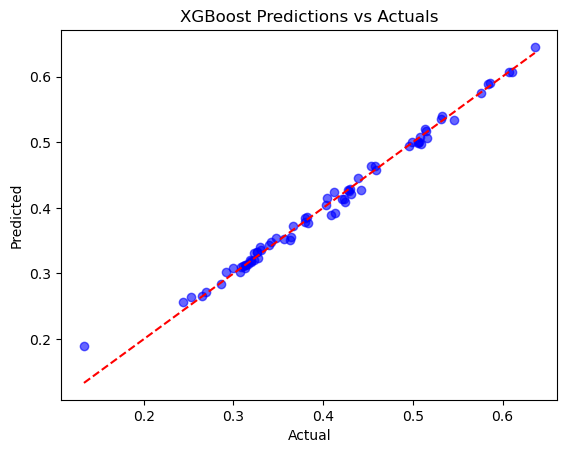

In [33]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost Predictions vs Actuals")
plt.show()

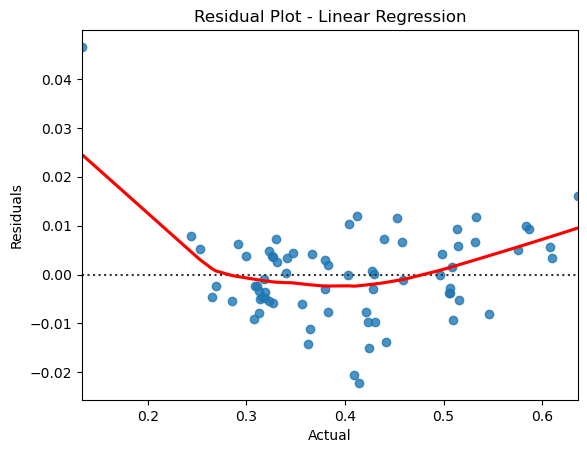

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot - Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.show()


In [35]:
import joblib
joblib.dump(model_linear,'linear.pkl')
joblib.dump(x.columns.tolist(),'columns_linear.pkl')

['columns_linear.pkl']